In [ ]:
%matplotlib inline  
import pandas as pd #data manipulation
import numpy as np #numerical calculations
import matplotlib.pyplot as plt #plot
import yfinance as yf  #幫我們抓取分析資料
#!pip install yfinance 安裝套件指令

##自由發揮題：加密貨幣-數據分析

* 目的：運用課堂所教之numpy, pandas套件幫助我們做價格資料整理、分析；接著，再利用matplotlib套件做資料視覺化，讓分析結果變得更淺顯易懂。

* 分析標的：'BTC-USD', 'ETH-USD', 'XRP-USD', 'BNB-USD', 'ADA-USD', 'BCH-USD','BSV-USD' (ps.價格資料為美元 USD)

* 分析區間：2012/07/08-2022/07/08 (10年)

* 撰寫思路：分析標的的日報酬率為主，除做基本的統計分析外，亦探討報酬率的分布情形。


[*********************100%***********************]  7 of 7 completed


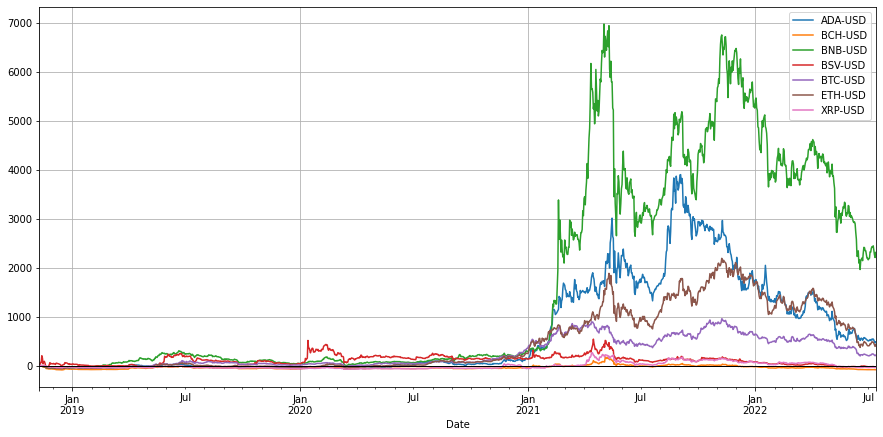

In [ ]:
#我們要分析的標的
tick = ['BTC-USD','ETH-USD','XRP-USD','BNB-USD','ADA-USD','BCH-USD',"BSV-USD"]
# 取過去10年收盤價資料
data =yf.download(tick,period="10y")['Close'] #get data
data = data.dropna() #drop na值
data.sort_index(ascending=True,inplace=True) #排序

#累積報酬率(畫在一起方便做比較)
cum_return = data.apply(lambda x: (x / x[0]-1)*100)
cum_return.plot(figsize=(15,7),grid = True).axhline(y = 0, color = "black", lw = 1)

In [ ]:
#算日報酬率
df=data
daily_return = df.apply(lambda x: (x / x.shift(1))-1)
daily_return=daily_return.dropna()
daily_return.head() #列出前幾筆            

,ADA-USD,BCH-USD,BNB-USD,BSV-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,,,,
2018-11-10,0.013405,0.022189,0.000347,0.266251,0.003696,0.011705,0.012044
2018-11-11,0.016751,-0.041614,-0.009576,0.303382,0.000320,-0.005613,-0.001549
2018-11-12,-0.006276,-0.031938,-0.011069,-0.012365,-0.006239,-0.004363,0.022241
2018-11-13,-0.031552,-0.007548,-0.012051,0.859669,-0.001849,-0.017071,-0.013638
2018-11-14,-0.119275,-0.142663,-0.090978,-0.161198,-0.097671,-0.122949,-0.070063


In [ ]:
#<<統計分析>> stocks.pct_change(1)=excess_ret
excess_ret=daily_return
excess_ret.corr() #daily_return 相關性

,ADA-USD,BCH-USD,BNB-USD,BSV-USD,BTC-USD,ETH-USD,XRP-USD
ADA-USD,1.000000,0.679743,0.603849,0.422778,0.678498,0.747274,0.605147
BCH-USD,0.679743,1.000000,0.592053,0.620233,0.747928,0.768645,0.619320
BNB-USD,0.603849,0.592053,1.000000,0.400102,0.654706,0.684658,0.535999
BSV-USD,0.422778,0.620233,0.400102,1.000000,0.477142,0.497257,0.400471
BTC-USD,0.678498,0.747928,0.654706,0.477142,1.000000,0.821070,0.589524
ETH-USD,0.747274,0.768645,0.684658,0.497257,0.821070,1.000000,0.639779
XRP-USD,0.605147,0.619320,0.535999,0.400471,0.589524,0.639779,1.000000


#### 了解一下每個幣種收益率分布情況

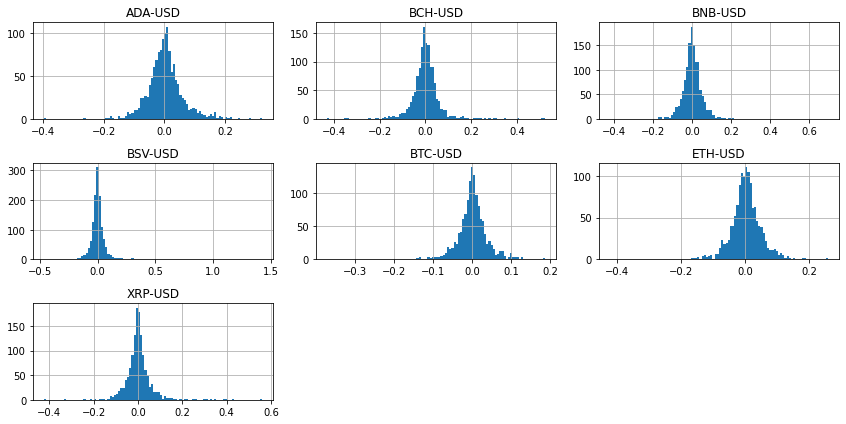

In [ ]:
#畫出每個幣種收益率的直方圖，了解一下分布情況。
excess_ret.hist(bins = 100,figsize = (12, 6)) 
plt.tight_layout()

In [ ]:
excess_ret.describe().transpose() #基本統計分析

,count,mean,std,min,25%,50%,75%,max
ADA-USD,1336.0,0.003081,0.058427,-0.395672,-0.028392,0.001224,0.030442,0.322384
BCH-USD,1336.0,0.000652,0.061304,-0.429560,-0.025111,-0.000729,0.025443,0.523201
BNB-USD,1336.0,0.003980,0.056553,-0.419046,-0.021404,0.001339,0.029202,0.697604
BSV-USD,1336.0,0.002916,0.085062,-0.463967,-0.024655,-0.001236,0.022414,1.424953
BTC-USD,1336.0,0.001658,0.038887,-0.371695,-0.015640,0.001377,0.018947,0.187465
ETH-USD,1336.0,0.002578,0.049684,-0.423472,-0.020968,0.001786,0.027594,0.259475
XRP-USD,1336.0,0.001421,0.059437,-0.423340,-0.021823,-0.000721,0.020453,0.560109


In [ ]:
excess_ret.cov() #cov() 共變異數 

,ADA-USD,BCH-USD,BNB-USD,BSV-USD,BTC-USD,ETH-USD,XRP-USD
ADA-USD,0.003414,0.002435,0.001995,0.002101,0.001542,0.002169,0.002102
BCH-USD,0.002435,0.003758,0.002053,0.003234,0.001783,0.002341,0.002257
BNB-USD,0.001995,0.002053,0.003198,0.001925,0.001440,0.001924,0.001802
BSV-USD,0.002101,0.003234,0.001925,0.007236,0.001578,0.002102,0.002025
BTC-USD,0.001542,0.001783,0.001440,0.001578,0.001512,0.001586,0.001363
ETH-USD,0.002169,0.002341,0.001924,0.002102,0.001586,0.002469,0.001889
XRP-USD,0.002102,0.002257,0.001802,0.002025,0.001363,0.001889,0.003533


In [ ]:
excess_ret.cov() * 365 #年化: multiply by days，加密貨幣全年時段可交易，故乘以365

,ADA-USD,BCH-USD,BNB-USD,BSV-USD,BTC-USD,ETH-USD,XRP-USD
ADA-USD,1.246022,0.888675,0.728275,0.766937,0.562681,0.791789,0.767061
BCH-USD,0.888675,1.371737,0.749204,1.180523,0.650798,0.854531,0.823676
BNB-USD,0.728275,0.749204,1.167370,0.702521,0.525534,0.702174,0.657619
BSV-USD,0.766937,1.180523,0.702521,2.641000,0.576079,0.767065,0.739029
BTC-USD,0.562681,0.650798,0.525534,0.576079,0.551951,0.579025,0.497345
ETH-USD,0.791789,0.854531,0.702174,0.767065,0.579025,0.901018,0.689609
XRP-USD,0.767061,0.823676,0.657619,0.739029,0.497345,0.689609,1.289471


### 價格變化是否為常態分佈？
* 這邊用BTC價格作為分析標的，其他幣的分析方法亦相同，因此專案這邊就不重複做了。
* 我們來繪製具有常態曲線疊加的價格變化直方圖來幫助我們判斷。


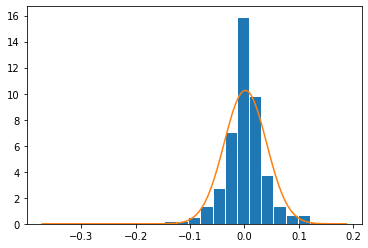

In [ ]:
from scipy.stats import norm #統計套件
from scipy import stats
n, minmax, mean, var, skew, kurt = stats.describe(daily_return['BTC-USD'])
mini, maxi = minmax
std = var ** 0.5
plt.hist(daily_return['BTC-USD'], bins = 25, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, norm.pdf(data, mean, std))

##Part-2 練習

### 1. 畫二個函數圖

第一個函數：$f(x) = \sin(x+4)$

第二個函數：$f(x) = \cos(x+4)$

In [ ]:
x = np.linspace(-15,15,200)

In [ ]:
len(x) #length

200

In [ ]:
y_1 = np.sin(x+4)
y_2 = np.cos(x+4)

In [ ]:
plt.xkcd() #Cartoon mode

Text(0.5, 1.0, 'Cartoon mode')

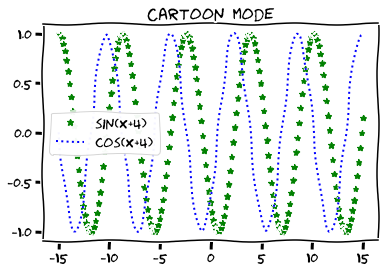

In [ ]:
#plot
plt.plot(x, y_1, '*g', label='sin(x+4)')
plt.plot(x, y_2,':b', label='cos(x+4)')
plt.legend()
plt.title("Cartoon mode")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

###挑戰題二：會計算BMI值的拍拍機器人

BMI = 體重(公斤)/身高(公尺)^2

國民健康署建議我國成人BMI應維持在18.5（kg/㎡）及24（kg/㎡）之間，太瘦、過重或太胖皆有礙健康。

In [ ]:
#輸入體重和身高
weight=int(input("體重（公斤）：")) 
hight=int(input("身高（公分）："))/100    
#BMI Calculation
bmi=round((weight/hight**2),2)      
print("BMI="+str(bmi))      #輸出BMI
#判斷BMI狀態
if bmi<18.5:           
  print("過輕了喔！")   
elif 18.5<=bmi and bmi<24:
  print("拍拍很棒！！，正常")
else:
  print("過重了喔！")



體重（公斤）：55
身高（公分）：155
BMI=22.89
拍拍很棒！！，正常
